# citarum water

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CitarumWater.csv to CitarumWater.csv



Distribusi kelas target:
Class
2    0.5984
1    0.3792
3    0.0156
4    0.0068
Name: proportion, dtype: float64

Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       190
           2       1.00      0.96      0.98       299
           3       0.78      0.88      0.82         8
           4       0.75      1.00      0.86         3

    accuracy                           0.97       500
   macro avg       0.87      0.96      0.91       500
weighted avg       0.97      0.97      0.97       500



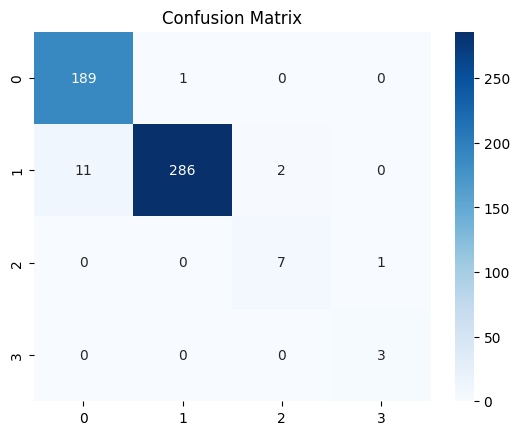

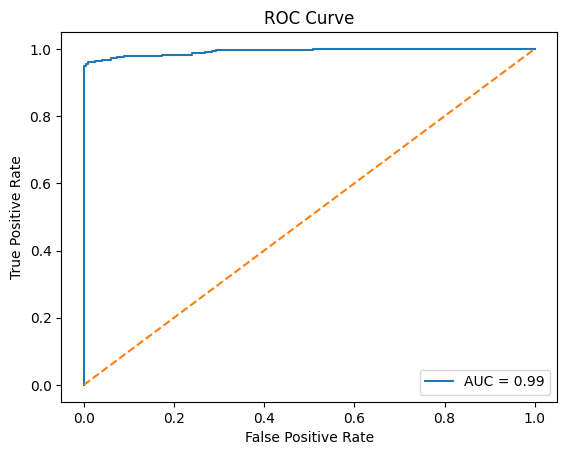

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc)

# ========================================================
# 1. PEMUATAN DATA & EKSPLORASI AWAL
# ========================================================

df = pd.read_csv('CitarumWater.csv')

# Hapus kolom yang tidak diperlukan
df.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2'], inplace=True)

# Konversi kolom 'Temp' menjadi numerik
df['Temp'] = df['Temp'].str.replace('°C', '').astype(float)

# Cek missing values
df.dropna(inplace=True)

# Pemilihan fitur dan target
TARGET_COL = 'Class'  # Kolom target
FEATURES = [col for col in df.columns if col != TARGET_COL]

X = df[FEATURES]
y = df[TARGET_COL]

# Analisis distribusi kelas
print("\nDistribusi kelas target:")
print(y.value_counts(normalize=True))

# ========================================================
# 2. PEMBAGIAN DATA & STANDARDISASI
# ========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Stratifikasi untuk menjaga distribusi kelas
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================================
# 3. PEMBANGUNAN MODEL
# ========================================================

# Handle class imbalance
class_weights = 'balanced' if y.nunique() > 1 else None

model = LogisticRegression(
    max_iter=1000,
    class_weight=class_weights,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# ========================================================
# 4. EVALUASI MODEL
# ========================================================

y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cmp = confusion_matrix(y_test, y_pred)
sns.heatmap(cmp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=y.unique()[1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Penjelasan Matematika:
1. Logistic Regression menggunakan fungsi sigmoid:
   P(y=1 | x) = 1 / (1 + exp(-wX))
   Di mana w adalah bobot dan X adalah fitur.
2. Evaluasi metrik:
   - Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - Precision = TP / (TP + FP)
   - Recall = TP / (TP + FN)
   - F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
   - AUC-ROC mengukur seberapa baik model dapat membedakan antara kelas.